## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
np.random.seed(5)
a ,b = -2, 1
X = np.random.uniform(0,20,50).reshape(-1,1)
Y = -2 * X + b
X = np.append(np.ones((X.shape[0],1)),X,axis = 1)
X.shape

(50, 2)

#### Plot your data points. 

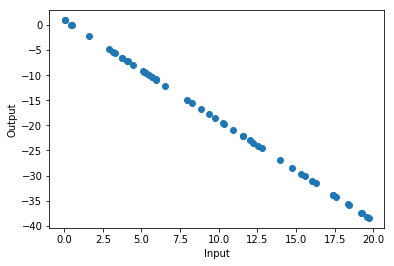

In [3]:
plt.scatter(X[:,1],Y)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [4]:
def gradient(x,y,alpha,epsilon,max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    XT = x.T
    for i in range(max_iter):
        hx = np.dot(x,theta)
        errors = np.subtract(hx,y)
        j = np.sum(errors**2)/(2*m)
        hxs.append(hx)
        thetas.append(theta)
        cost.append(j)
        iteration.append(i)
        print("Iteration %d | The Cost is %f" %(i,j))
        if j <= epsilon :
            return theta
        gradients = (np.dot(XT,errors)*alpha)/m
        theta = theta - gradients
    return theta,np.array(thetas),cost,iteration,np.array(hxs)
t,ts,l,it,hy = gradient(X,Y,.001,.001,1000)

Iteration 0 | The Cost is 241.260489
Iteration 1 | The Cost is 182.316092
Iteration 2 | The Cost is 137.783647
Iteration 3 | The Cost is 104.139415
Iteration 4 | The Cost is 78.721214
Iteration 5 | The Cost is 59.517770
Iteration 6 | The Cost is 45.009567
Iteration 7 | The Cost is 34.048613
Iteration 8 | The Cost is 25.767601
Iteration 9 | The Cost is 19.511283
Iteration 10 | The Cost is 14.784618
Iteration 11 | The Cost is 11.213604
Iteration 12 | The Cost is 8.515683
Iteration 13 | The Cost is 6.477383
Iteration 14 | The Cost is 4.937426
Iteration 15 | The Cost is 3.773966
Iteration 16 | The Cost is 2.894950
Iteration 17 | The Cost is 2.230830
Iteration 18 | The Cost is 1.729064
Iteration 19 | The Cost is 1.349956
Iteration 20 | The Cost is 1.063517
Iteration 21 | The Cost is 0.847088
Iteration 22 | The Cost is 0.683553
Iteration 23 | The Cost is 0.559978
Iteration 24 | The Cost is 0.466593
Iteration 25 | The Cost is 0.396017
Iteration 26 | The Cost is 0.342673
Iteration 27 | The Cos

Iteration 760 | The Cost is 0.118954
Iteration 761 | The Cost is 0.118889
Iteration 762 | The Cost is 0.118823
Iteration 763 | The Cost is 0.118758
Iteration 764 | The Cost is 0.118693
Iteration 765 | The Cost is 0.118627
Iteration 766 | The Cost is 0.118562
Iteration 767 | The Cost is 0.118497
Iteration 768 | The Cost is 0.118432
Iteration 769 | The Cost is 0.118367
Iteration 770 | The Cost is 0.118302
Iteration 771 | The Cost is 0.118237
Iteration 772 | The Cost is 0.118171
Iteration 773 | The Cost is 0.118106
Iteration 774 | The Cost is 0.118042
Iteration 775 | The Cost is 0.117977
Iteration 776 | The Cost is 0.117912
Iteration 777 | The Cost is 0.117847
Iteration 778 | The Cost is 0.117782
Iteration 779 | The Cost is 0.117717
Iteration 780 | The Cost is 0.117652
Iteration 781 | The Cost is 0.117588
Iteration 782 | The Cost is 0.117523
Iteration 783 | The Cost is 0.117458
Iteration 784 | The Cost is 0.117394
Iteration 785 | The Cost is 0.117329
Iteration 786 | The Cost is 0.117265
I

In [5]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9984527199805654


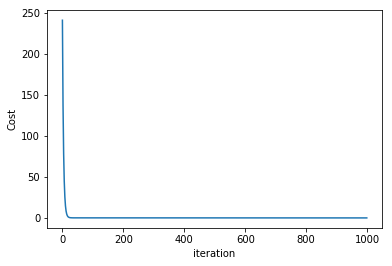

In [6]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [7]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

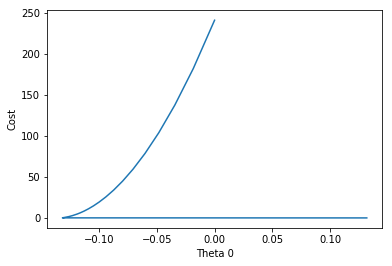

In [8]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

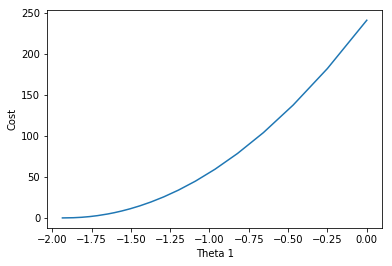

In [9]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

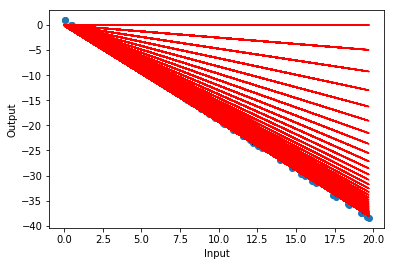

In [10]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

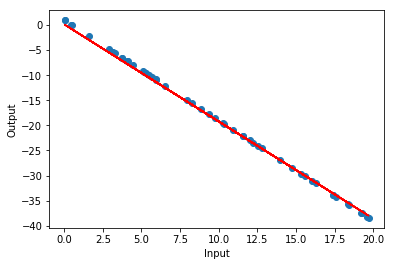

In [11]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

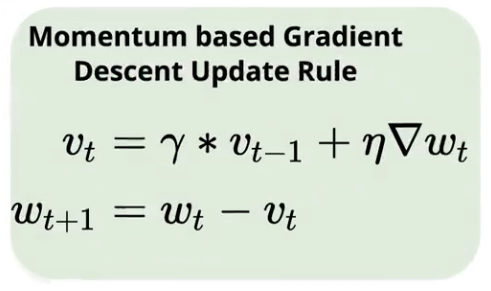

#### γ takes values between 0 and 1.
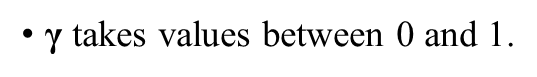

In [12]:
def momentumGradient(x,y,gamma,alpha,epsilon,max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    XT = x.T
    vn = 0
    for i in range(max_iter):
        theta_copy = theta.copy()
        hx = np.dot(x,theta)
        errors = np.subtract(hx,y)
        j = np.sum(errors**2)/(2*m)
        print("Iteration %d | The Cost is %f" %(i,j))
        hxs.append(hx)
        thetas.append(theta)
        cost.append(j)
        iteration.append(i)
        gradients = (np.dot(XT,errors)*alpha)/m
        vn = gamma*vn + gradients
        theta = theta - vn
        if j <= epsilon or (theta==theta_copy).all():
            print("Iteration %d | The Cost is %f" %(i,j))
            return theta,np.array(thetas),cost,iteration,np.array(hxs)
    return theta,np.array(thetas),cost,iteration,np.array(hxs)
t,ts,l,it,hy = momentumGradient(X,Y,.99,.00001,.001,2000)

Iteration 0 | The Cost is 241.260489
Iteration 1 | The Cost is 240.630208
Iteration 2 | The Cost is 239.379226
Iteration 3 | The Cost is 237.520224
Iteration 4 | The Cost is 235.068855
Iteration 5 | The Cost is 232.043609
Iteration 6 | The Cost is 228.465651
Iteration 7 | The Cost is 224.358664
Iteration 8 | The Cost is 219.748670
Iteration 9 | The Cost is 214.663853
Iteration 10 | The Cost is 209.134363
Iteration 11 | The Cost is 203.192122
Iteration 12 | The Cost is 196.870623
Iteration 13 | The Cost is 190.204721
Iteration 14 | The Cost is 183.230428
Iteration 15 | The Cost is 175.984698
Iteration 16 | The Cost is 168.505218
Iteration 17 | The Cost is 160.830195
Iteration 18 | The Cost is 152.998147
Iteration 19 | The Cost is 145.047697
Iteration 20 | The Cost is 137.017367
Iteration 21 | The Cost is 128.945381
Iteration 22 | The Cost is 120.869470
Iteration 23 | The Cost is 112.826686
Iteration 24 | The Cost is 104.853223
Iteration 25 | The Cost is 96.984241
Iteration 26 | The Cost

Iteration 689 | The Cost is 0.312565
Iteration 690 | The Cost is 0.317800
Iteration 691 | The Cost is 0.322558
Iteration 692 | The Cost is 0.326817
Iteration 693 | The Cost is 0.330558
Iteration 694 | The Cost is 0.333767
Iteration 695 | The Cost is 0.336430
Iteration 696 | The Cost is 0.338539
Iteration 697 | The Cost is 0.340087
Iteration 698 | The Cost is 0.341071
Iteration 699 | The Cost is 0.341492
Iteration 700 | The Cost is 0.341352
Iteration 701 | The Cost is 0.340657
Iteration 702 | The Cost is 0.339417
Iteration 703 | The Cost is 0.337643
Iteration 704 | The Cost is 0.335348
Iteration 705 | The Cost is 0.332549
Iteration 706 | The Cost is 0.329266
Iteration 707 | The Cost is 0.325519
Iteration 708 | The Cost is 0.321332
Iteration 709 | The Cost is 0.316730
Iteration 710 | The Cost is 0.311739
Iteration 711 | The Cost is 0.306387
Iteration 712 | The Cost is 0.300705
Iteration 713 | The Cost is 0.294723
Iteration 714 | The Cost is 0.288474
Iteration 715 | The Cost is 0.281989
I

Iteration 1315 | The Cost is 0.091461
Iteration 1316 | The Cost is 0.091405
Iteration 1317 | The Cost is 0.091348
Iteration 1318 | The Cost is 0.091290
Iteration 1319 | The Cost is 0.091232
Iteration 1320 | The Cost is 0.091172
Iteration 1321 | The Cost is 0.091111
Iteration 1322 | The Cost is 0.091050
Iteration 1323 | The Cost is 0.090988
Iteration 1324 | The Cost is 0.090925
Iteration 1325 | The Cost is 0.090861
Iteration 1326 | The Cost is 0.090797
Iteration 1327 | The Cost is 0.090732
Iteration 1328 | The Cost is 0.090667
Iteration 1329 | The Cost is 0.090602
Iteration 1330 | The Cost is 0.090536
Iteration 1331 | The Cost is 0.090470
Iteration 1332 | The Cost is 0.090404
Iteration 1333 | The Cost is 0.090338
Iteration 1334 | The Cost is 0.090272
Iteration 1335 | The Cost is 0.090206
Iteration 1336 | The Cost is 0.090140
Iteration 1337 | The Cost is 0.090074
Iteration 1338 | The Cost is 0.090009
Iteration 1339 | The Cost is 0.089944
Iteration 1340 | The Cost is 0.089879
Iteration 13

Iteration 1982 | The Cost is 0.062393
Iteration 1983 | The Cost is 0.062358
Iteration 1984 | The Cost is 0.062322
Iteration 1985 | The Cost is 0.062287
Iteration 1986 | The Cost is 0.062252
Iteration 1987 | The Cost is 0.062217
Iteration 1988 | The Cost is 0.062181
Iteration 1989 | The Cost is 0.062146
Iteration 1990 | The Cost is 0.062111
Iteration 1991 | The Cost is 0.062076
Iteration 1992 | The Cost is 0.062041
Iteration 1993 | The Cost is 0.062006
Iteration 1994 | The Cost is 0.061971
Iteration 1995 | The Cost is 0.061936
Iteration 1996 | The Cost is 0.061901
Iteration 1997 | The Cost is 0.061866
Iteration 1998 | The Cost is 0.061831
Iteration 1999 | The Cost is 0.061796


In [13]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-23.52787718]


In [14]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9990973079404298


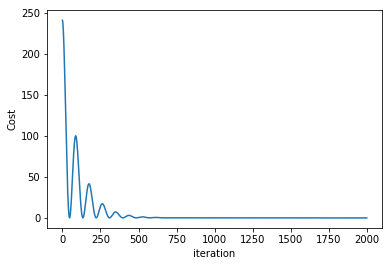

In [15]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [16]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

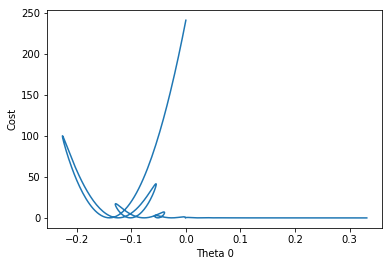

In [17]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

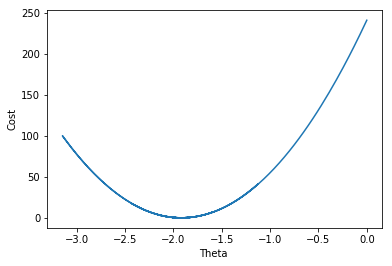

In [18]:
plt.plot(theta_1,l)
plt.xlabel("Theta ")
plt.ylabel("Cost")
plt.show()

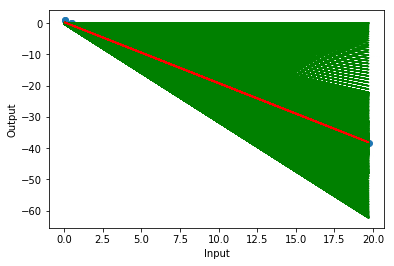

In [19]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='g')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

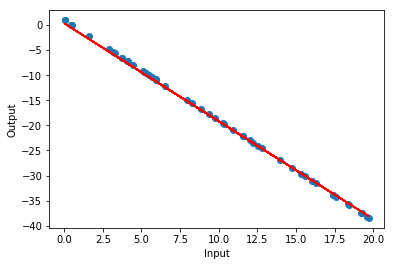

In [20]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [21]:
t,ts,l,it,hy = momentumGradient(X,Y,.00001,.001,.001,2000)

Iteration 0 | The Cost is 241.260489
Iteration 1 | The Cost is 182.316092
Iteration 2 | The Cost is 137.783170
Iteration 3 | The Cost is 104.138695
Iteration 4 | The Cost is 78.720398
Iteration 5 | The Cost is 59.516948
Iteration 6 | The Cost is 45.008791
Iteration 7 | The Cost is 34.047909
Iteration 8 | The Cost is 25.766981
Iteration 9 | The Cost is 19.510747
Iteration 10 | The Cost is 14.784163
Iteration 11 | The Cost is 11.213222
Iteration 12 | The Cost is 8.515366
Iteration 13 | The Cost is 6.477122
Iteration 14 | The Cost is 4.937212
Iteration 15 | The Cost is 3.773792
Iteration 16 | The Cost is 2.894808
Iteration 17 | The Cost is 2.230716
Iteration 18 | The Cost is 1.728972
Iteration 19 | The Cost is 1.349883
Iteration 20 | The Cost is 1.063458
Iteration 21 | The Cost is 0.847042
Iteration 22 | The Cost is 0.683516
Iteration 23 | The Cost is 0.559949
Iteration 24 | The Cost is 0.466570
Iteration 25 | The Cost is 0.395999
Iteration 26 | The Cost is 0.342659
Iteration 27 | The Cos

Iteration 698 | The Cost is 0.123082
Iteration 699 | The Cost is 0.123014
Iteration 700 | The Cost is 0.122946
Iteration 701 | The Cost is 0.122879
Iteration 702 | The Cost is 0.122811
Iteration 703 | The Cost is 0.122744
Iteration 704 | The Cost is 0.122676
Iteration 705 | The Cost is 0.122609
Iteration 706 | The Cost is 0.122541
Iteration 707 | The Cost is 0.122474
Iteration 708 | The Cost is 0.122406
Iteration 709 | The Cost is 0.122339
Iteration 710 | The Cost is 0.122272
Iteration 711 | The Cost is 0.122205
Iteration 712 | The Cost is 0.122137
Iteration 713 | The Cost is 0.122070
Iteration 714 | The Cost is 0.122003
Iteration 715 | The Cost is 0.121936
Iteration 716 | The Cost is 0.121869
Iteration 717 | The Cost is 0.121802
Iteration 718 | The Cost is 0.121735
Iteration 719 | The Cost is 0.121668
Iteration 720 | The Cost is 0.121601
Iteration 721 | The Cost is 0.121534
Iteration 722 | The Cost is 0.121467
Iteration 723 | The Cost is 0.121400
Iteration 724 | The Cost is 0.121334
I

Iteration 1371 | The Cost is 0.084991
Iteration 1372 | The Cost is 0.084944
Iteration 1373 | The Cost is 0.084898
Iteration 1374 | The Cost is 0.084851
Iteration 1375 | The Cost is 0.084804
Iteration 1376 | The Cost is 0.084758
Iteration 1377 | The Cost is 0.084711
Iteration 1378 | The Cost is 0.084664
Iteration 1379 | The Cost is 0.084618
Iteration 1380 | The Cost is 0.084571
Iteration 1381 | The Cost is 0.084525
Iteration 1382 | The Cost is 0.084478
Iteration 1383 | The Cost is 0.084432
Iteration 1384 | The Cost is 0.084385
Iteration 1385 | The Cost is 0.084339
Iteration 1386 | The Cost is 0.084293
Iteration 1387 | The Cost is 0.084246
Iteration 1388 | The Cost is 0.084200
Iteration 1389 | The Cost is 0.084153
Iteration 1390 | The Cost is 0.084107
Iteration 1391 | The Cost is 0.084061
Iteration 1392 | The Cost is 0.084015
Iteration 1393 | The Cost is 0.083968
Iteration 1394 | The Cost is 0.083922
Iteration 1395 | The Cost is 0.083876
Iteration 1396 | The Cost is 0.083830
Iteration 13

In [22]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-23.52624516]


In [23]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9991217261297508


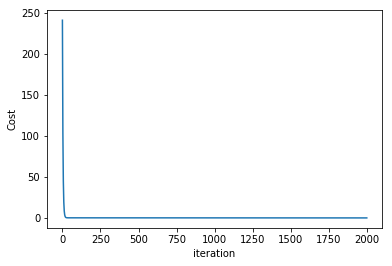

In [24]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [25]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

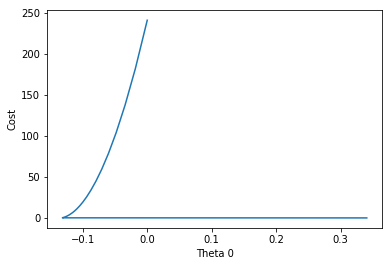

In [26]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

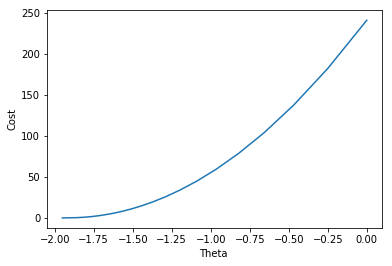

In [27]:
plt.plot(theta_1,l)
plt.xlabel("Theta ")
plt.ylabel("Cost")
plt.show()

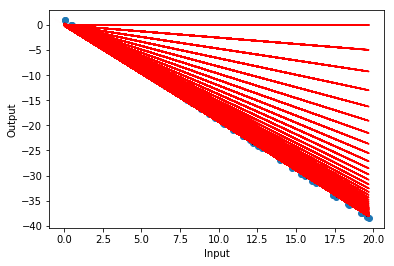

In [28]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

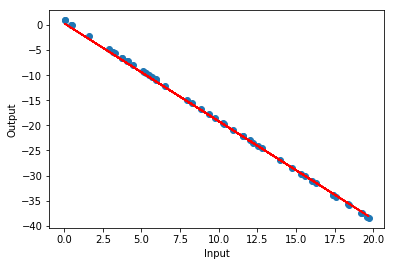

In [29]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [30]:
t,ts,l,it,hy = momentumGradient(X,Y,0,.001,.001,2000)

Iteration 0 | The Cost is 241.260489
Iteration 1 | The Cost is 182.316092
Iteration 2 | The Cost is 137.783647
Iteration 3 | The Cost is 104.139415
Iteration 4 | The Cost is 78.721214
Iteration 5 | The Cost is 59.517770
Iteration 6 | The Cost is 45.009567
Iteration 7 | The Cost is 34.048613
Iteration 8 | The Cost is 25.767601
Iteration 9 | The Cost is 19.511283
Iteration 10 | The Cost is 14.784618
Iteration 11 | The Cost is 11.213604
Iteration 12 | The Cost is 8.515683
Iteration 13 | The Cost is 6.477383
Iteration 14 | The Cost is 4.937426
Iteration 15 | The Cost is 3.773966
Iteration 16 | The Cost is 2.894950
Iteration 17 | The Cost is 2.230830
Iteration 18 | The Cost is 1.729064
Iteration 19 | The Cost is 1.349956
Iteration 20 | The Cost is 1.063517
Iteration 21 | The Cost is 0.847088
Iteration 22 | The Cost is 0.683553
Iteration 23 | The Cost is 0.559978
Iteration 24 | The Cost is 0.466593
Iteration 25 | The Cost is 0.396017
Iteration 26 | The Cost is 0.342673
Iteration 27 | The Cos

Iteration 708 | The Cost is 0.122407
Iteration 709 | The Cost is 0.122340
Iteration 710 | The Cost is 0.122272
Iteration 711 | The Cost is 0.122205
Iteration 712 | The Cost is 0.122138
Iteration 713 | The Cost is 0.122071
Iteration 714 | The Cost is 0.122003
Iteration 715 | The Cost is 0.121936
Iteration 716 | The Cost is 0.121869
Iteration 717 | The Cost is 0.121802
Iteration 718 | The Cost is 0.121735
Iteration 719 | The Cost is 0.121668
Iteration 720 | The Cost is 0.121601
Iteration 721 | The Cost is 0.121534
Iteration 722 | The Cost is 0.121468
Iteration 723 | The Cost is 0.121401
Iteration 724 | The Cost is 0.121334
Iteration 725 | The Cost is 0.121267
Iteration 726 | The Cost is 0.121201
Iteration 727 | The Cost is 0.121134
Iteration 728 | The Cost is 0.121067
Iteration 729 | The Cost is 0.121001
Iteration 730 | The Cost is 0.120934
Iteration 731 | The Cost is 0.120868
Iteration 732 | The Cost is 0.120801
Iteration 733 | The Cost is 0.120735
Iteration 734 | The Cost is 0.120668
I

Iteration 1335 | The Cost is 0.086692
Iteration 1336 | The Cost is 0.086644
Iteration 1337 | The Cost is 0.086597
Iteration 1338 | The Cost is 0.086549
Iteration 1339 | The Cost is 0.086501
Iteration 1340 | The Cost is 0.086454
Iteration 1341 | The Cost is 0.086406
Iteration 1342 | The Cost is 0.086359
Iteration 1343 | The Cost is 0.086311
Iteration 1344 | The Cost is 0.086264
Iteration 1345 | The Cost is 0.086216
Iteration 1346 | The Cost is 0.086169
Iteration 1347 | The Cost is 0.086122
Iteration 1348 | The Cost is 0.086074
Iteration 1349 | The Cost is 0.086027
Iteration 1350 | The Cost is 0.085979
Iteration 1351 | The Cost is 0.085932
Iteration 1352 | The Cost is 0.085885
Iteration 1353 | The Cost is 0.085838
Iteration 1354 | The Cost is 0.085790
Iteration 1355 | The Cost is 0.085743
Iteration 1356 | The Cost is 0.085696
Iteration 1357 | The Cost is 0.085649
Iteration 1358 | The Cost is 0.085602
Iteration 1359 | The Cost is 0.085555
Iteration 1360 | The Cost is 0.085508
Iteration 13

In [31]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-23.52624547]


In [32]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9991217162214273


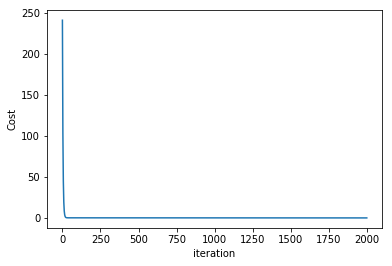

In [33]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [34]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

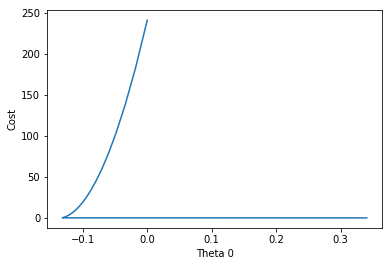

In [35]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

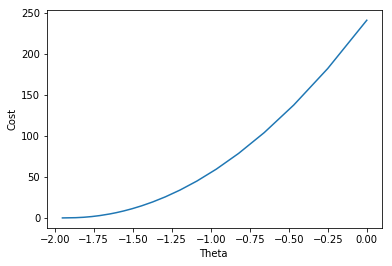

In [36]:
plt.plot(theta_1,l)
plt.xlabel("Theta ")
plt.ylabel("Cost")
plt.show()

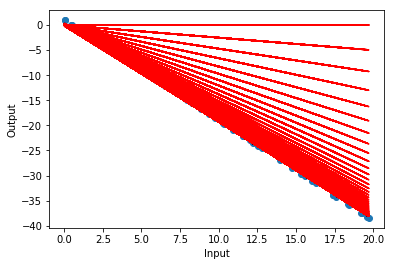

In [37]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

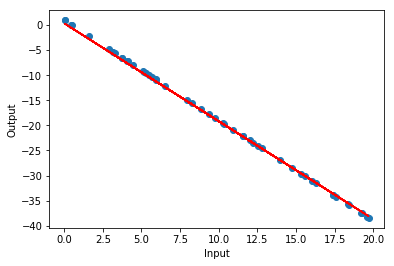

In [38]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [39]:
t,ts,l,it,hy = momentumGradient(X,Y,.99,.001,.001,2000)

Iteration 0 | The Cost is 241.260489
Iteration 1 | The Cost is 182.316092
Iteration 2 | The Cost is 94.654149
Iteration 3 | The Cost is 22.365373
Iteration 4 | The Cost is 0.928871
Iteration 5 | The Cost is 39.519847
Iteration 6 | The Cost is 116.913309
Iteration 7 | The Cost is 192.775680
Iteration 8 | The Cost is 228.352812
Iteration 9 | The Cost is 205.951071
Iteration 10 | The Cost is 137.426860
Iteration 11 | The Cost is 57.628855
Iteration 12 | The Cost is 6.394221
Iteration 13 | The Cost is 8.391412
Iteration 14 | The Cost is 61.001497
Iteration 15 | The Cost is 136.179743
Iteration 16 | The Cost is 195.081962
Iteration 17 | The Cost is 207.837272
Iteration 18 | The Cost is 168.409359
Iteration 19 | The Cost is 97.161381
Iteration 20 | The Cost is 30.077788
Iteration 21 | The Cost is 0.335363
Iteration 22 | The Cost is 21.654652
Iteration 23 | The Cost is 81.778851
Iteration 24 | The Cost is 149.161955
Iteration 25 | The Cost is 189.235872
Iteration 26 | The Cost is 181.875419
I

In [40]:
print(X[5])
print(Y[5])
print(np.dot(X[5],t))

[ 1.         12.23487726]
[-23.46975452]
[-22.7952869]


In [41]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9970698645124306


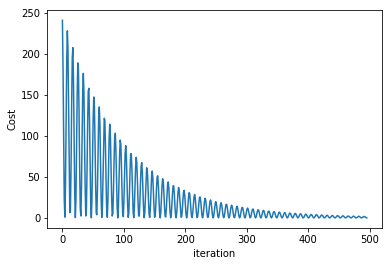

In [42]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [43]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

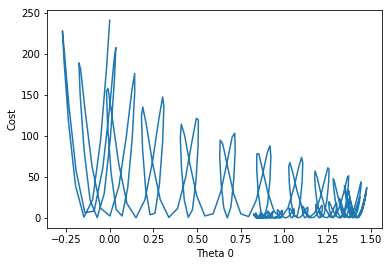

In [44]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

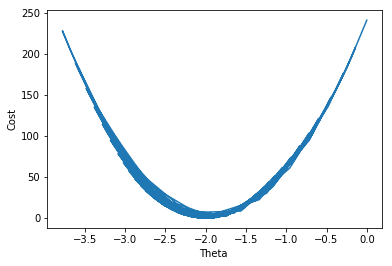

In [45]:
plt.plot(theta_1,l)
plt.xlabel("Theta ")
plt.ylabel("Cost")
plt.show()

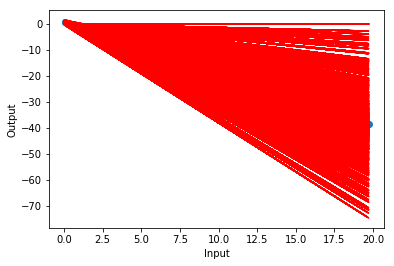

In [46]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='r')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

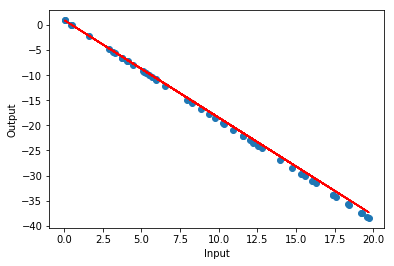

In [47]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

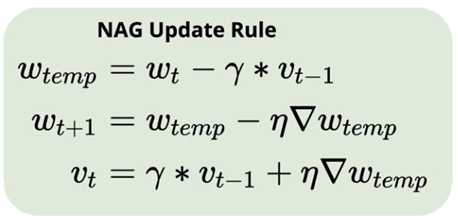

In [48]:
def NAG(x,y,gamma,alpha,epsilon,max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    XT = x.T
    vn = 0
    for i in range(max_iter):
        theta_copy =theta.copy()
        temp_theta = theta - gamma * vn 
        hx = np.dot(x,temp_theta)
        errors = np.subtract(hx,y)
        j = np.sum(errors**2)/(2*m)
        hxs.append(hx)
        thetas.append(theta)
        cost.append(j)
        iteration.append(i)
        print("Iteration %d | The Cost is %f" %(i,j))
        gradients = (np.dot(XT,errors)*alpha)/m
        theta = temp_theta - gradients
        vn = gamma*vn + gradients
        if j <= epsilon or (theta==theta_copy).all():
            print("Iteration %d | The Cost is %f" %(i,j))
            return theta,np.array(thetas),cost,iteration,np.array(hxs)
    return theta
t,ts,l,it,hy = NAG(X,Y,.99,.00001,.001,2000)

Iteration 0 | The Cost is 241.260489
Iteration 1 | The Cost is 240.007043
Iteration 2 | The Cost is 238.145583
Iteration 3 | The Cost is 235.692543
Iteration 4 | The Cost is 232.667145
Iteration 5 | The Cost is 229.091232
Iteration 6 | The Cost is 224.989098
Iteration 7 | The Cost is 220.387300
Iteration 8 | The Cost is 215.314475
Iteration 9 | The Cost is 209.801137
Iteration 10 | The Cost is 203.879481
Iteration 11 | The Cost is 197.583174
Iteration 12 | The Cost is 190.947146
Iteration 13 | The Cost is 184.007380
Iteration 14 | The Cost is 176.800700
Iteration 15 | The Cost is 169.364558
Iteration 16 | The Cost is 161.736831
Iteration 17 | The Cost is 153.955603
Iteration 18 | The Cost is 146.058972
Iteration 19 | The Cost is 138.084843
Iteration 20 | The Cost is 130.070741
Iteration 21 | The Cost is 122.053617
Iteration 22 | The Cost is 114.069672
Iteration 23 | The Cost is 106.154186
Iteration 24 | The Cost is 98.341351
Iteration 25 | The Cost is 90.664118
Iteration 26 | The Cost 

Iteration 706 | The Cost is 0.208318
Iteration 707 | The Cost is 0.206926
Iteration 708 | The Cost is 0.205355
Iteration 709 | The Cost is 0.203617
Iteration 710 | The Cost is 0.201720
Iteration 711 | The Cost is 0.199676
Iteration 712 | The Cost is 0.197495
Iteration 713 | The Cost is 0.195191
Iteration 714 | The Cost is 0.192774
Iteration 715 | The Cost is 0.190258
Iteration 716 | The Cost is 0.187656
Iteration 717 | The Cost is 0.184979
Iteration 718 | The Cost is 0.182243
Iteration 719 | The Cost is 0.179459
Iteration 720 | The Cost is 0.176642
Iteration 721 | The Cost is 0.173803
Iteration 722 | The Cost is 0.170956
Iteration 723 | The Cost is 0.168114
Iteration 724 | The Cost is 0.165289
Iteration 725 | The Cost is 0.162493
Iteration 726 | The Cost is 0.159738
Iteration 727 | The Cost is 0.157034
Iteration 728 | The Cost is 0.154393
Iteration 729 | The Cost is 0.151825
Iteration 730 | The Cost is 0.149339
Iteration 731 | The Cost is 0.146945
Iteration 732 | The Cost is 0.144650
I

Iteration 1357 | The Cost is 0.088846
Iteration 1358 | The Cost is 0.088795
Iteration 1359 | The Cost is 0.088744
Iteration 1360 | The Cost is 0.088694
Iteration 1361 | The Cost is 0.088643
Iteration 1362 | The Cost is 0.088593
Iteration 1363 | The Cost is 0.088543
Iteration 1364 | The Cost is 0.088493
Iteration 1365 | The Cost is 0.088443
Iteration 1366 | The Cost is 0.088394
Iteration 1367 | The Cost is 0.088344
Iteration 1368 | The Cost is 0.088295
Iteration 1369 | The Cost is 0.088245
Iteration 1370 | The Cost is 0.088196
Iteration 1371 | The Cost is 0.088147
Iteration 1372 | The Cost is 0.088098
Iteration 1373 | The Cost is 0.088049
Iteration 1374 | The Cost is 0.088000
Iteration 1375 | The Cost is 0.087952
Iteration 1376 | The Cost is 0.087903
Iteration 1377 | The Cost is 0.087854
Iteration 1378 | The Cost is 0.087806
Iteration 1379 | The Cost is 0.087757
Iteration 1380 | The Cost is 0.087709
Iteration 1381 | The Cost is 0.087660
Iteration 1382 | The Cost is 0.087612
Iteration 13

ValueError: not enough values to unpack (expected 5, got 2)

In [ ]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

In [ ]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [ ]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

In [ ]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

In [ ]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

In [ ]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='g')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [ ]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Congratulations 
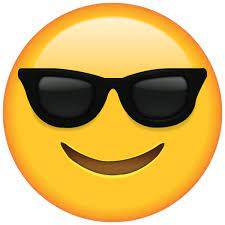